## Energy types and relative contributions

Here I'll try to explain the relative contribution of kinetic energy (KE), potential energy from SSH (PE) and available potential energy (APE), which I'll ignore at the end, and what happens to this partition when Sebastian Vizcaíno Bay is modeled.

In [43]:
# Import libraries
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [44]:
# Load energy calculations I saved from other scrips and notebooks.
dt = 600 #s

# barotropic APE (ssh contribution to PE)
EP_baro = np.load('PE_barotropic.npz')
EP_febTS = np.load('PE_febTS.npz')

# APE (using density anomaly)
APE_febTS = np.load('APE_febTS.npz')

# KE
KE_baro = np.load('KE_barotropic.npz')
KE_febTS = np.load('KE_febTS.npz')

# I got these from wind_and_kinetic_energy.ipynb
Ewind_SVB =        np.array([1967.336140,
                             13658.249842,
                             58381.587749,
                             203059.249746,
                             583040.490311,
                            1605971.282449,
                            4212949.908733,
                            9988163.429514,
                            22737647.608706,
                            49719098.402076,
                            100951667.449054,
                            195337257.246875,
                            361892444.111385,
                            631783365.147192,
                            1047506643.644784,
                            1656420482.996358,
                            2488822890.624424,
                            3552559954.569267,
                            4826334444.561691,
                            6249001678.690140,
                            7481331481.931970,
                            0.000000])

Ewind_noSVB =          np.array([1908.242113,
                                13250.440428,
                                56643.048604,
                                197022.699529,
                                565736.516323,
                                1558333.593194,
                                4088052.794804,
                                9692372.395526,
                                22064613.394391,
                                48247946.294462,
                                97966799.420028,
                                189564709.144951,
                                351202565.610907,
                                613133365.634483,
                                1016604312.240177,
                                1607583381.294032,
                                2415491252.341014,
                                3447959452.724622,
                                4684328563.799050,
                                6065263172.112794,
                                7261647121.061090,
                                0.000000])

Ewind_onlySVB =       np.array([57.999554,
                                399.526290,
                                1701.314444,
                                5902.245192,
                                16903.844723,
                                46522.982646,
                                121952.956161,
                                288711.758155,
                                656842.711860,
                                1435618.962636,
                                2912042.260602,
                                5630858.473472,
                                10426294.092496,
                                18186848.292017,
                                30130501.571881,
                                47611648.716257,
                                71482254.507949,
                                101949005.517322,
                                138389008.463340,
                                179037874.016783,
                                213991926.116055,
                                0.000000
                                ])

### Wind power input

Wind power input per unit area

$$P =\vec{u_s}\cdot\vec{\tau},$$
where $\vec{u_s}$ is the surface velocity and $\vec{\tau}$ is the wind stress. Then, an integral of P over area gives a flux of energy in J/s. And an integration over time gives us the total energy input.

Eg. intro in https://www.sciencedirect.com/science/article/pii/S0967063708001994 or
https://journals.ametsoc.org/view/journals/phoc/36/2/jpo2842.1.xml

In [45]:
# integrate the wind power input over the whole time it is applied (total energy input into the system)
tot_wind_energy_SVB = np.sum(Ewind_SVB*dt)
tot_wind_energy_noSVB = np.sum(Ewind_noSVB*dt)
tot_wind_energy_onlySVB = np.sum(Ewind_onlySVB*dt)

print('Total wind energy input [J] into SVB is %1.3e' %tot_wind_energy_SVB)
print('Total wind energy input [J] into noSVB is %1.3e' %tot_wind_energy_noSVB)
print('Total wind energy input [J] into the bay alone is %1.3e' %tot_wind_energy_onlySVB)
print('which is %1.2f percent of the noSVB wind energy input.' %((100*tot_wind_energy_onlySVB)/tot_wind_energy_noSVB))

Total wind energy input [J] into SVB is 1.721e+13
Total wind energy input [J] into noSVB is 1.670e+13
Total wind energy input [J] into the bay alone is 4.934e+11
which is 2.95 percent of the noSVB wind energy input.


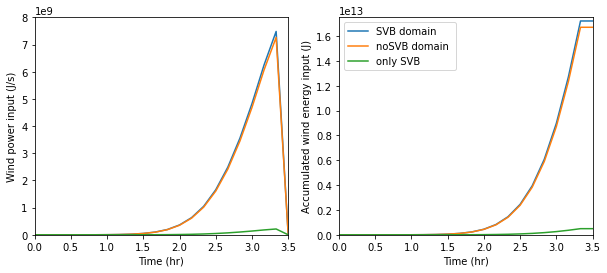

In [46]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), sharex=True)

ax1.plot((np.arange(len(Ewind_SVB))*600)/3600,Ewind_SVB, label='SVB domain')
ax1.plot((np.arange(len(Ewind_noSVB))*600)/3600,Ewind_noSVB, label='noSVB domain')
ax1.plot((np.arange(len(Ewind_onlySVB))*600)/3600,Ewind_onlySVB, label='only SVB ')
ax1.set_ylabel('Wind power input (J/s)')
ax1.set_xlabel('Time (hr)')
ax1.set_xlim(0,3.5)
ax1.set_ylim(0,8E9)

ax2.plot((np.arange(len(Ewind_SVB))*600)/3600,np.cumsum(Ewind_SVB*dt), label='SVB domain ')
ax2.plot((np.arange(len(Ewind_noSVB))*600)/3600,np.cumsum(Ewind_noSVB*dt), label='noSVB domain ')
ax2.plot((np.arange(len(Ewind_onlySVB))*600)/3600,np.cumsum(Ewind_onlySVB*dt), label='only SVB')
ax2.set_ylabel('Accumulated wind energy input (J)')
ax2.set_xlabel('Time (hr)')
ax2.set_ylim(0,1.75E13)
ax2.legend()

* The blue lines correspond to the wind power (left) and wind energy (right) over the whole domain in the run with SVB; the orange lines correspond to the wind power and energy over the whole domain in the noSVB run; and the green line is the difference between these two. The green line matches the power and energy if we only calculate the power or energy over the bay area.

* So, the green lines are the extra wind power and energy that we have because the area with water in the SVB domain is larger than in the noSVB domain.

* The amount of extra energy we are putting into the system is $4.934\times10^{11}$ J, which is 3% of the total wind energy input into the noSVB run.  

### Barotropic APE (ssh) and APE

I divided potential energy into available potential energy and barotropic potential energy, or the one that comes from changes in SSH. In the barotropic run, there is no APE, only ssh PE. I calculated these two contributions in the following way:

#### ssh contribution

Consider only barotropic contribution from SSH. 
$$APE_{BT}(t)= \frac{1}{2}\int\int \rho_0 g [H-H_0]~dx~dy= \frac{1}{2}\int\int \rho_0 g \eta~ dx~dy $$

where $H_0$ is the reference depth, $H$ is the depth of the water column, $\eta=H-H_0$ is the free surface, $\rho_0$ is a constant reference density which I chose to be the average of the initial density profile (maybe I should do a weighted avg or something like that). I got this from the Dolzhanky book, but it is also in Vallis.

#### density anomalies contribution
As in Klymak and Muom (2003), but intergated over volume (their domain is 2D and they only integrate over x and w).

$$APE(t) = \int \int \int g (\rho-\rho_0) z dx~dy~dz, $$

where $(\rho-\rho_0)=\rho_{Anoma}$ in MITgcm output.

I think APE is not something I really care about.

In [47]:
# load PEs calculated in the scripts energy_calc_barotropic.py and
# energy_calcs_baroclinic.py (I called it EP because Spanish...)

EP_SVB_baro = EP_baro['EpSVB'][:]
EP_noSVB_baro = EP_baro['EpnoSVB'][:]
EP_onlySVB_baro = EP_baro['Ep'][:]
EP_maskSVB_baro = EP_baro['Epsvbmask'][:]

EP_SVB = EP_febTS['EpSVB'][:]
EP_noSVB = EP_febTS['EpnoSVB'][:]
EP_onlySVB = EP_febTS['Ep'][:]
EP_maskSVB = EP_febTS['Epsvbmask'][:]

APE_SVB = APE_febTS['APESVB'][:]
APE_noSVB = APE_febTS['APEnoSVB'][:]
APE_onlySVB = APE_febTS['APE'][:]
APE_maskSVB = APE_febTS['APEsvbmask'][:]

**Important**:

It's worth claryfing that the suffix

**\_SVB** means I calculated PE and APE in the whole domain of the SVB run, 

**\_noSVB** is the same but for the noSVB run, 

**\_onlySVB** means I calculated PE and APE by subtracting the fields (ssh,u,v,w, rhoanom, etc) between the SVB run and the noSVB run and considering only the domain without the bay (noSVB land mask), and

**\_maskSVB** means the same as \onlySVB but considering the bay AND the rest of the domain (using the SVB land mask).

#### Let's plot PE:

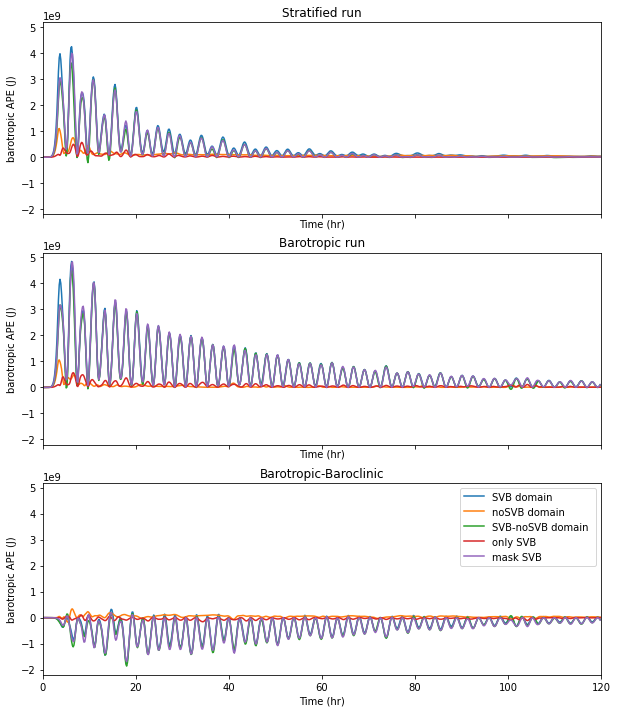

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,12), sharex=True, sharey=True)

ax1.plot((np.arange(len(EP_SVB))*600)/3600,EP_SVB, label='SVB domain')
ax1.plot((np.arange(len(EP_noSVB))*600)/3600,EP_noSVB, label='noSVB domain')
ax1.plot((np.arange(len(EP_SVB))*600)/3600,EP_SVB-EP_noSVB, label='SVB-noSVB domain')
ax1.plot((np.arange(len(EP_onlySVB))*600)/3600,EP_onlySVB, label='only SVB ')
ax1.plot((np.arange(len(EP_maskSVB))*600)/3600,EP_maskSVB, label='mask SVB ')

ax1.set_ylabel('barotropic APE (J)')
ax1.set_xlabel('Time (hr)')
#ax1.set_xlim(0,3.5)
#ax1.set_ylim(0,8E9)
ax1.set_title('Stratified run')

ax2.plot((np.arange(len(EP_SVB))*600)/3600,(EP_SVB_baro), label='SVB domain ')
ax2.plot((np.arange(len(EP_noSVB))*600)/3600,(EP_noSVB_baro), label='noSVB domain ')
ax2.plot((np.arange(len(EP_noSVB))*600)/3600,(EP_SVB_baro-EP_noSVB_baro), label='SVB-noSVB domain ')
ax2.plot((np.arange(len(EP_onlySVB))*600)/3600,(EP_onlySVB_baro), label='only SVB')
ax2.plot((np.arange(len(EP_maskSVB))*600)/3600,(EP_maskSVB_baro), label='mask SVB')

ax2.set_ylabel('barotropic APE (J)')
ax2.set_xlabel('Time (hr)')
ax2.set_title('Barotropic run')

ax3.plot((np.arange(len(EP_SVB))*600)/3600,(EP_SVB-EP_SVB_baro), label='SVB domain ')
ax3.plot((np.arange(len(EP_noSVB))*600)/3600,(EP_noSVB-EP_noSVB_baro), label='noSVB domain ')
ax3.plot((np.arange(len(EP_noSVB))*600)/3600,(EP_SVB-EP_SVB_baro-(EP_noSVB-EP_noSVB_baro)), label='SVB-noSVB domain ')
ax3.plot((np.arange(len(EP_onlySVB))*600)/3600,(EP_onlySVB-EP_onlySVB_baro), label='only SVB')
ax3.plot((np.arange(len(EP_maskSVB))*600)/3600,(EP_maskSVB-EP_maskSVB_baro), label='mask SVB')

ax3.set_ylabel('barotropic APE (J)')
ax3.set_xlabel('Time (hr)')
ax3.set_title('Barotropic-Baroclinic')
ax3.set_xlim(0,120)
ax3.legend()
plt.show()

Each of these lines tells us about different contributions. EP on the whole domain with SVB (blue) is much larger than EP on the whole domain without the bay (orange). The difference between them is the green line, which is similar to calculating EP using the difference in SSH between the run with the bay and without the bay and keeping the contribution of the bay by using the land mask of the run with bay (purple), while omitting the SSH contribution at the bay by using the noSVB mask gives a much smaller EP (red). 

So, the wind blows and a tiny fraction goes into moving the SSH (these are 4 orders of magnitude smaller than the total energy from the wind), reflected here as SSH EP. The effect of the bay (SVB-noSVB) is the blue line, and from that, the largest portion is going into the seiche in the bay (green), and the rest is the effect over the domain(orange). We will calculate percentages later.

#### Now let's see APE
In comparison to EP, APE is huge! (O(1E14) vs O(1E9)) But this is expected and I will not look into it because there is no way to compare to the barotropic run. I'll focus on the differences between baroclinic and barotropic runs. Still, that oscillation looks interesting...

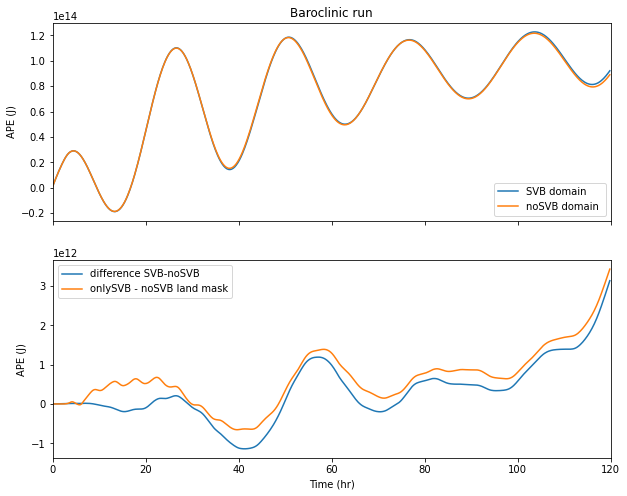

In [58]:
fig, (ax,ax2) = plt.subplots(2,1, figsize=(10,8), sharex=True)

ax.plot((np.arange(len(APE_SVB))*600)/3600,(APE_SVB), label='SVB domain ')
ax.plot((np.arange(len(APE_noSVB))*600)/3600,(APE_noSVB), label='noSVB domain ')
ax2.plot((np.arange(len(APE_noSVB))*600)/3600,(APE_SVB-APE_noSVB), label='difference SVB-noSVB ')
ax2.plot((np.arange(len(APE_noSVB))*600)/3600,(APE_onlySVB-APE_onlySVB[0]), label='onlySVB - noSVB land mask')

ax.set_ylabel('APE (J)')
ax2.set_ylabel('APE (J)')
ax2.set_xlabel('Time (hr)')
ax.set_title('Baroclinic run')
ax.set_xlim(0,120)
ax.legend()
ax2.legend()

### Kinetic energy

$$KE(t)=\frac{1}{2}\int\int\int \rho (u^2+v^2+w^2)~dx~dy~dz,$$

where $\rho=\rho(x,y,z,t)=\rho_{anoma}(x,y,z,t)+\rho_{ref}(z)$ from model output.
 

In [50]:
# Loading pre-calculated energies
KE_SVB_baro = KE_baro['KSVB'][:]
KE_noSVB_baro = KE_baro['KnoSVB'][:]
KE_onlySVB_baro = KE_baro['K'][:]
KE_maskSVB_baro = KE_baro['K_svbmask'][:]

KE_SVB = KE_febTS['KSVB'][:]
KE_noSVB = KE_febTS['KnoSVB'][:]
KE_onlySVB = KE_febTS['K'][:]
KE_maskSVB = KE_febTS['K_svbmask'][:]

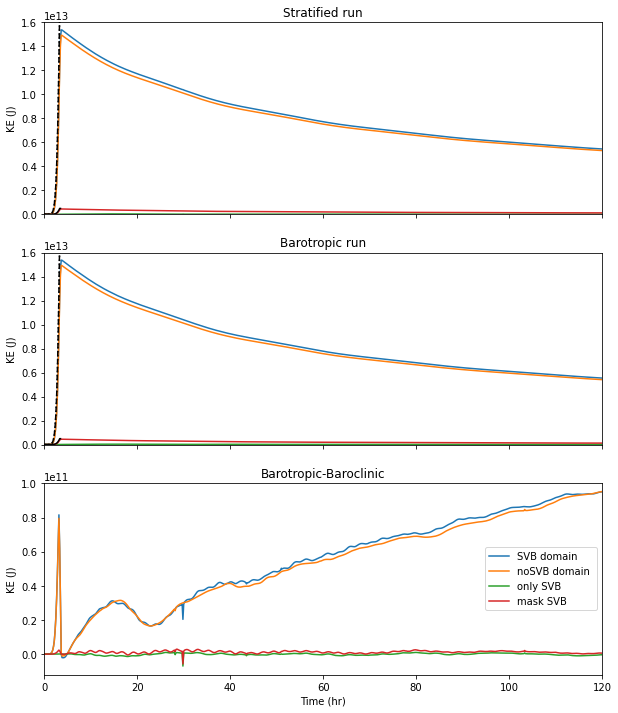

In [51]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,12), sharex=True)

ax1.plot((np.arange(len(KE_SVB))*600)/3600,KE_SVB, label='SVB domain')
ax1.plot((np.arange(len(KE_noSVB))*600)/3600,KE_noSVB, label='noSVB domain')
ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_onlySVB, label='only SVB ')
ax1.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB, label='mask SVB ')

ax1.plot((np.arange(len(Ewind_SVB))*600)/3600,np.cumsum(Ewind_SVB*dt),'k--' ,label='wind SVB domain ')
ax1.plot((np.arange(len(Ewind_noSVB))*600)/3600,np.cumsum(Ewind_noSVB*dt), 'k:',label='wind noSVB domain ')
ax1.plot((np.arange(len(Ewind_onlySVB))*600)/3600,np.cumsum(Ewind_onlySVB*dt), 'k-',label='wind only SVB')
ax1.set_ylabel('KE (J)')
ax1.set_ylim(0,1.6E13)
ax1.set_title('Stratified run')

ax2.plot((np.arange(len(KE_SVB))*600)/3600,(KE_SVB_baro), label='SVB domain ')
ax2.plot((np.arange(len(KE_noSVB))*600)/3600,(KE_noSVB_baro), label='noSVB domain ')
ax2.plot((np.arange(len(KE_onlySVB))*600)/3600,(KE_onlySVB_baro), label='only SVB')
ax2.plot((np.arange(len(KE_maskSVB))*600)/3600,(KE_maskSVB_baro), label='mask SVB')
ax2.plot((np.arange(len(Ewind_SVB))*600)/3600,np.cumsum(Ewind_SVB*dt),'k--' ,label='wind SVB domain ')
ax2.plot((np.arange(len(Ewind_noSVB))*600)/3600,np.cumsum(Ewind_noSVB*dt), 'k:',label='wind noSVB domain ')
ax2.plot((np.arange(len(Ewind_onlySVB))*600)/3600,np.cumsum(Ewind_onlySVB*dt), 'k-',label='wind only SVB')

ax2.set_ylabel('KE (J)')
ax2.set_title('Barotropic run')
ax2.set_ylim(0,1.6E13)

ax3.plot((np.arange(len(KE_SVB))*600)/3600,(KE_SVB_baro-KE_SVB), label='SVB domain ')
ax3.plot((np.arange(len(KE_noSVB))*600)/3600,(KE_noSVB_baro-KE_noSVB), label='noSVB domain ')
ax3.plot((np.arange(len(KE_onlySVB))*600)/3600,(KE_onlySVB_baro-KE_onlySVB), label='only SVB')
ax3.plot((np.arange(len(KE_maskSVB))*600)/3600,(KE_maskSVB_baro-KE_maskSVB), label='mask SVB')
ax3.set_ylabel('KE (J)')
ax3.set_xlabel('Time (hr)')
ax3.set_title('Barotropic-Baroclinic')
ax3.set_xlim(0,120)
ax3.legend()
plt.show()

Blue lines correspond to the KE in the whole SVB run domain; orange lines correspond to KE in the noSVB run domain; green lines correspond to KE calcualted from velocity differences between SVB and noSVB runs in the no SVB domain and red is the same but including the region of the bay. Note: I didn't use the difference in densities to calculate the KE induced by the bay, I used the full density field from the run with the bay.

* KE with and without the bay matches very well the energy input from the wind (dashed black line, and black solid line). There is some loss probably due to dissipation at boundaries, viscous dissipation, etc. If I add the PE it will make no difference because PE is super small.
* KE is 1E4 times larger than EP in the whole domain. 
* Barotropic run has more KE than the stratified run with and without the bay. 

#### Effect of the bay
Since KE with and without bay is a lot larger than the effect of the bay on KE, let's only plot differences SVB-noSVB:

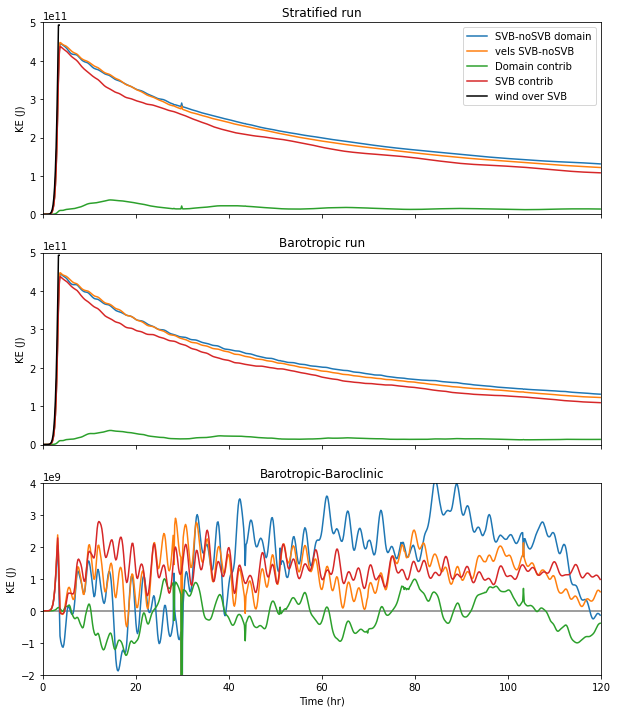

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,12), sharex=True)

ax1.plot((np.arange(len(KE_SVB))*600)/3600,KE_SVB-KE_noSVB, label='SVB-noSVB domain')
ax1.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB, label='vels SVB-noSVB')
ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_onlySVB, label='Domain contrib ')
ax1.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB-KE_onlySVB, label='SVB contrib ')
ax1.plot((np.arange(len(Ewind_onlySVB))*600)/3600,np.cumsum(Ewind_onlySVB*dt), 'k-',label='wind over SVB')
ax1.set_ylabel('KE (J)')
ax1.set_title('Stratified run')
ax1.set_ylim(0,5E11)

ax2.plot((np.arange(len(KE_SVB))*600)/3600,KE_SVB_baro-KE_noSVB_baro, label='SVB-noSVB domain')
ax2.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB_baro, label='vels SVB-noSVB')
ax2.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_onlySVB_baro, label='Domain contrib ')
ax2.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB_baro-KE_onlySVB_baro, label='SVB contrib ')
ax2.plot((np.arange(len(Ewind_onlySVB))*600)/3600,np.cumsum(Ewind_onlySVB*dt), 'k-',label='wind over SVB')
ax2.set_ylabel('KE (J)')
ax2.set_title('Barotropic run')
ax2.set_ylim(0,5E11)

ax3.axhline(0,color='0.5')
ax3.plot((np.arange(len(KE_SVB))*600)/3600,(KE_SVB_baro-KE_noSVB_baro)-(KE_SVB-KE_noSVB), label='SVB-noSVB domain')
ax3.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB_baro-KE_maskSVB, label='vels SVB-noSVB')
ax3.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_onlySVB_baro-KE_onlySVB, label='Domain contrib ')
ax3.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB_baro-KE_onlySVB_baro-(KE_maskSVB-KE_onlySVB), label='SVB contrib ')
ax3.set_ylabel('KE (J)')
ax3.set_xlabel('Time (hr)')
ax3.set_title('Barotropic-Baroclinic')
ax3.set_xlim(0,120)
ax3.set_ylim(-0.2E10,0.4E10)

ax1.legend()

In the first two plots we see differences in KE between the SVB run and noSVB run in the stratified run (top) and barotropic run (middle). The blue lines are the difference between KE in the whole SVB domain and noSVB domains; the green line is the KE calcualted in the noSVB domain using the velocity anomaly (SVB-noSVB velocities) and the red line is the KE only within the bay.

So, we see that the difference in KE between the runs with SVB and without SVB is mostly due to KE in the bay (red line), but there is an effect in KE in the rest of the domain as well (green line). 

Bottom plot:

* Larger KE induced by the bay in the barotropic run (blue and orange lines).
* The KE from the bay also larger in barotropic run (red line) 
* KE induced by the bay in the rest of the domain oscillates is at times larger in barotropic run and sometimes smaller. I guess this is where internal waves play a role?

### Summary

#### In the full runs (plot below)

* The wind blows over the domain for 3.5 hours. The total wind energy input is 1.721e+13 J for the SVB run domain, 1.670e+13 J for the noSVB run domain, a difference of 3%. The input into the SVB alone is 4.934e+11 J.
* KE increases following the wind energy input closely for the first 3.5 hrs, reaching a maximum of 1.54e13 J (SVB) 1.49e13 J (noSVB) (same numbers for barotropic, differences O(1e11)) - these are 89% of the total wind energy input.
* PE due to SSH changes is much smaller than KE, O(1E9), but PE in the SVB run is 4x larger than in the no SVB run, during the first day of simulaton.
* PE oscillates in time; KE decreases smoothly.
* KE is always larger in the barotropic runs with and without SVB than in the stratified runs,it shows a peak that follows the forcing, and the difference increases in time after the first day (O(1e10))
* PE is always larger in the barotropic run with the bay, the difference oscillates, and it is maximum at about 20 hrs.
* PE is larger in the baroclinic run without the bay, and the difference between barotropic and baroclinic is much smaller (~10x) than in the SVB run.

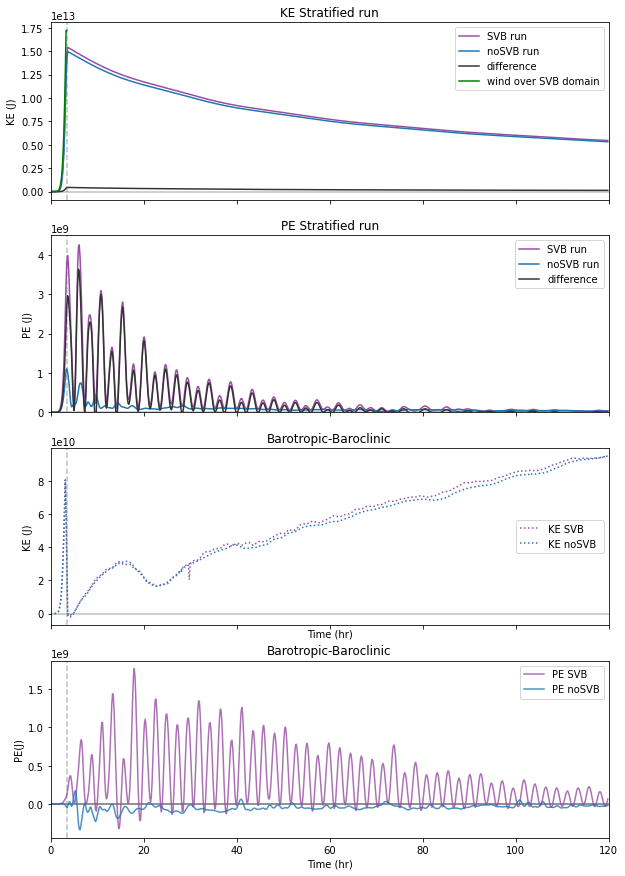

In [53]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(10,15), sharex=True)

for ax in (ax1,ax2,ax3,ax4):
    ax.axvline(3.5,color='0.5', linestyle='--', alpha=0.5)
    ax.axhline(0, color='0.5', alpha=0.5)

ax1.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_SVB, color='#984ea3', label='SVB run')
ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_noSVB, color='#1f78b4',label='noSVB run')
ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_SVB-KE_noSVB, color='0.2',label='difference')
ax1.plot((np.arange(len(Ewind_onlySVB))*600)/3600,np.cumsum(Ewind_SVB*dt), 'g-',label='wind over SVB domain')
ax1.set_ylabel('KE (J)')
ax1.set_title('KE Stratified run')

ax2.plot((np.arange(len(EP_SVB))*600)/3600,EP_SVB,color='#984ea3', label='SVB run')
ax2.plot((np.arange(len(EP_onlySVB))*600)/3600,EP_noSVB, color='#1f78b4', label='noSVB run')
ax2.plot((np.arange(len(EP_onlySVB))*600)/3600,EP_SVB-EP_noSVB, color='0.2', label='difference')
ax2.set_ylabel('PE (J)')
ax2.set_title('PE Stratified run')
ax2.set_ylim(0,4.5E9)

ax3.plot((np.arange(len(KE_maskSVB))*600)/3600,(KE_SVB_baro-KE_SVB),':', 
         color='#984ea3', label='KE SVB', alpha=1)
ax3.plot((np.arange(len(KE_onlySVB))*600)/3600,(KE_noSVB_baro-KE_noSVB), ':',
         color='#1f78b4', label='KE noSVB ' , alpha=1)

ax3.set_ylabel('KE (J)')
ax3.set_xlabel('Time (hr)')
ax3.set_title('Barotropic-Baroclinic')
ax3.set_xlim(0,120)

ax4.axhline(0,color='0.5')
ax4.plot((np.arange(len(EP_SVB))*600)/3600,(EP_SVB_baro-EP_SVB),
         color='#984ea3', 
         label='PE SVB', alpha=0.8)
ax4.plot((np.arange(len(EP_onlySVB))*600)/3600,(EP_noSVB_baro-EP_noSVB),
         color='#1f78b4', 
         label='PE noSVB', alpha=0.8)
ax4.set_ylabel('PE(J)')
ax4.set_xlabel('Time (hr)')
ax4.set_title('Barotropic-Baroclinic')
ax4.set_xlim(0,120)

ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()


#### Effect of the bay

* The excess wind energy input due to the bay is 4.934e+11 J (3% of the total wind forcing).
* Maximum KE due to the velocities induced by the bay (purple line) account for 90% of the excess wind forcing.
* Of all the KE induced by SVB, KE in the bay is 100% and decays to 85% by day 5 (very last plots)
* KE in the rest of the domain is 0% at the beginning and increases to 15% by day 5.
* PE induced by the bay is two orders of magnitude smaller than KE, and it is dominated by the SSH response in the bay (green line vs purple line in middle panel below).
* PE relative contributions of the bay and the rest of the domain vary wildly due to its oscillatory nature. 
* The mean contributions to PE are 26% from the domain and 74% from the bay SVB.
* During the first day these contributions are 16% and 84% respectively, and during day 5, 28% and 72%, respectively.
* Mean contributions to PE in the barotropic case are 17% domain and 83% SVB.
* They go from 12% and 88% during the first day to 18 and 82% during day 5.
* The effect of the bay in KE in the barotropic run is larger than in the stratified run
* The effect of the bay in PE in the barotropic run is also larger than in the stratified run within SVB and overall, but in the rest of the domain it is not always larger. On average it is negative. 


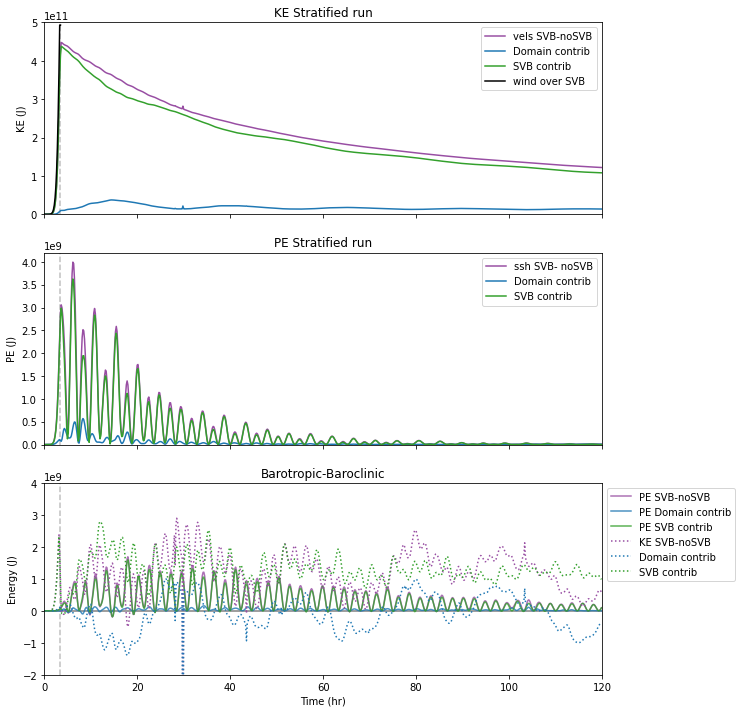

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10,12), sharex=True)

for ax in (ax1,ax2,ax3):
    ax.axvline(3.5,color='0.5', linestyle='--', alpha=0.5)
#ax1.plot((np.arange(len(KE_SVB))*600)/3600,KE_SVB-KE_noSVB, color='orange', label='SVB-noSVB domain')
ax1.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB, color='#984ea3', label='vels SVB-noSVB')
ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_onlySVB, color='#1f78b4',label='Domain contrib ')
ax1.plot((np.arange(len(KE_maskSVB))*600)/3600,KE_maskSVB-KE_onlySVB,color='#33a02c', label='SVB contrib ')
ax1.plot((np.arange(len(Ewind_onlySVB))*600)/3600,np.cumsum(Ewind_onlySVB*dt), 'k-',label='wind over SVB')
ax1.set_ylabel('KE (J)')
ax1.set_title('KE Stratified run')
ax1.set_ylim(0,5E11)

ax2.plot((np.arange(len(EP_SVB))*600)/3600,EP_maskSVB,color='#984ea3', label='ssh SVB- noSVB')
ax2.plot((np.arange(len(EP_onlySVB))*600)/3600,EP_onlySVB, color='#1f78b4', label='Domain contrib')
ax2.plot((np.arange(len(EP_maskSVB))*600)/3600,EP_maskSVB-EP_onlySVB,color='#33a02c', label='SVB contrib')

ax2.set_ylabel('PE (J)')
ax2.set_title('PE Stratified run')
ax2.set_ylim(0,4.2E9)

ax3.axhline(0,color='0.5')
ax3.plot((np.arange(len(EP_SVB))*600)/3600,(EP_maskSVB_baro-EP_maskSVB),
         color='#984ea3', 
         label='PE SVB-noSVB', alpha=0.8)
ax3.plot((np.arange(len(EP_onlySVB))*600)/3600,(EP_onlySVB_baro-EP_onlySVB),
         color='#1f78b4', 
         label='PE Domain contrib', alpha=0.8)
ax3.plot((np.arange(len(EP_maskSVB))*600)/3600,((EP_maskSVB_baro-EP_onlySVB_baro)-(EP_maskSVB-EP_onlySVB)),
         color='#33a02c', label='PE SVB contrib', alpha=0.8)#
#ax3.plot((np.arange(len(KE_SVB))*600)/3600,(KE_SVB_baro-KE_noSVB_baro)-(KE_SVB-KE_noSVB),':',color='orange',
#         label='KE SVB-noSVB domain')
ax3.plot((np.arange(len(KE_maskSVB))*600)/3600,(KE_maskSVB_baro-KE_maskSVB),':', 
         color='#984ea3', label='KE SVB-noSVB', alpha=1)
ax3.plot((np.arange(len(KE_onlySVB))*600)/3600,(KE_onlySVB_baro-KE_onlySVB), ':',
         color='#1f78b4', label='Domain contrib ' , alpha=1)
ax3.plot((np.arange(len(KE_maskSVB))*600)/3600,(KE_maskSVB_baro-KE_onlySVB_baro-(KE_maskSVB-KE_onlySVB)),
         ':',color='#33a02c', label='SVB contrib ', alpha=1)

ax3.set_ylabel('Energy (J)')
ax3.set_xlabel('Time (hr)')
ax3.set_title('Barotropic-Baroclinic')
ax3.set_xlim(0,120)
ax3.set_ylim(-0.2E10,0.4E10)

ax1.legend()
ax2.legend()
ax3.legend(bbox_to_anchor=(1,1))

baroclinic
mean PE contribution domain 0.25733
mean PE contribution SVB 0.74267
day 1: mean PE contribution domain 0.15983
day 1: mean PE contribution SVB 0.84017
day 5: mean PE contribution domain 0.28171
day 5: mean PE contribution SVB 0.71829
barotropic
mean PE contribution domain 0.16832
mean PE contribution SVB 0.83168
day 1: mean PE contribution domain 0.12480
day 1: mean PE contribution SVB 0.87520
day 5: mean PE contribution domain 0.17920
day 5: mean PE contribution SVB 0.82080
mean difference barotropic-baroclinic
mean PE difference domain 31976065.75556
mean PE difference SVB 331112371.57361
mean PE difference 363088437.32917
mean KE difference domain -86642478.97500
mean KE difference SVB 1260359809.55694
mean KE difference 1173717330.58194


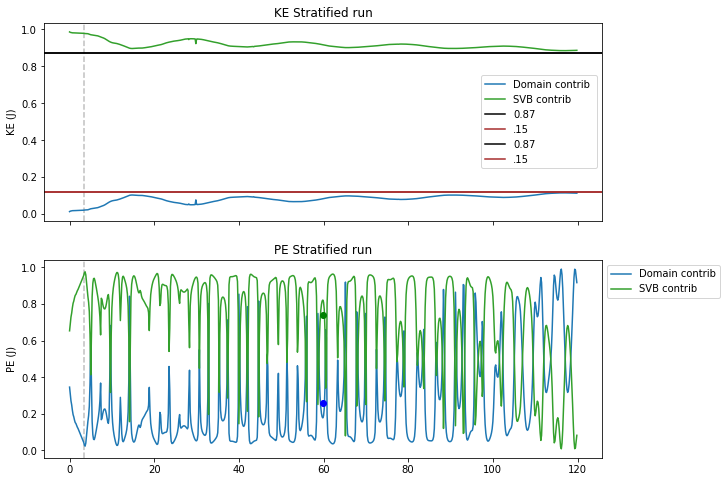

In [55]:
# relative contributions

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,8), sharex=True)

for ax in (ax1,ax2):
    ax.axvline(3.5,color='0.5', linestyle='--', alpha=0.5)

ax1.plot((np.arange(len(KE_onlySVB))*600)/3600,KE_onlySVB/KE_maskSVB, color='#1f78b4',label='Domain contrib ')
ax1.plot((np.arange(len(KE_maskSVB))*600)/3600,(KE_maskSVB-KE_onlySVB)/KE_maskSVB,color='#33a02c', label='SVB contrib ')
ax1.set_ylabel('KE (J)')
ax1.set_title('KE Stratified run')
ax1.axhline(0.87, color='k', label='0.87')
ax1.axhline(0.12, color='brown', label='.15')

ax2.plot((np.arange(len(EP_onlySVB))*600)/3600,EP_onlySVB/EP_maskSVB, color='#1f78b4', label='Domain contrib')
ax2.plot(np.nanmean((np.arange(len(EP_onlySVB))*600)/3600),np.nanmean(EP_onlySVB/EP_maskSVB), 'bo')


ax2.plot((np.arange(len(EP_maskSVB))*600)/3600,(EP_maskSVB-EP_onlySVB)/EP_maskSVB,color='#33a02c', label='SVB contrib')
ax2.plot(np.nanmean((np.arange(len(EP_onlySVB))*600)/3600),np.nanmean((EP_maskSVB-EP_onlySVB)/EP_maskSVB), 'go')

ax2.set_ylabel('PE (J)')
ax2.set_title('PE Stratified run')
ax1.axhline(0.87, color='k', label='0.87')
ax1.axhline(0.12, color='brown', label='.15')

ax1.legend()
ax2.legend(bbox_to_anchor=(1,1))

print('baroclinic')
print('mean PE contribution domain %1.5f' %np.nanmean(EP_onlySVB/EP_maskSVB))
print('mean PE contribution SVB %1.5f' %np.nanmean((EP_maskSVB-EP_onlySVB)/EP_maskSVB))
print('day 1: mean PE contribution domain %1.5f' %np.nanmean(EP_onlySVB[:144]/EP_maskSVB[:144]))
print('day 1: mean PE contribution SVB %1.5f' %np.nanmean((EP_maskSVB[:144]-EP_onlySVB[:144])/EP_maskSVB[:144]))
print('day 5: mean PE contribution domain %1.5f' %np.nanmean(EP_onlySVB[720-(144*4):]/EP_maskSVB[720-(144*4):]))
print('day 5: mean PE contribution SVB %1.5f' %np.nanmean((EP_maskSVB[720-(144*4):]-EP_onlySVB[720-(144*4):])/EP_maskSVB[720-(144*4):]))

print('barotropic')
print('mean PE contribution domain %1.5f' %np.nanmean(EP_onlySVB_baro/EP_maskSVB_baro))
print('mean PE contribution SVB %1.5f' %np.nanmean((EP_maskSVB_baro-EP_onlySVB_baro)/EP_maskSVB_baro))
print('day 1: mean PE contribution domain %1.5f' %np.nanmean(EP_onlySVB_baro[:144]/EP_maskSVB_baro[:144]))
print('day 1: mean PE contribution SVB %1.5f' %np.nanmean((EP_maskSVB_baro[:144]-EP_onlySVB_baro[:144])/EP_maskSVB_baro[:144]))
print('day 5: mean PE contribution domain %1.5f' %np.nanmean(EP_onlySVB_baro[720-(144*4):]/EP_maskSVB_baro[720-(144*4):]))
print('day 5: mean PE contribution SVB %1.5f' %np.nanmean((EP_maskSVB_baro[720-(144*4):]-EP_onlySVB_baro[720-(144*4):])/EP_maskSVB_baro[720-(144*4):]))

print('mean difference barotropic-baroclinic')
print('mean PE difference domain %1.5f' %np.nanmean(EP_onlySVB_baro-EP_onlySVB))
print('mean PE difference SVB %1.5f' %np.nanmean((EP_maskSVB_baro-EP_onlySVB_baro)-(EP_maskSVB-EP_onlySVB)))
print('mean PE difference %1.5f' %np.nanmean(EP_maskSVB_baro-EP_maskSVB))
print('mean KE difference domain %1.5f' %np.nanmean(KE_onlySVB_baro-KE_onlySVB))
print('mean KE difference SVB %1.5f' %np.nanmean((KE_maskSVB_baro-KE_onlySVB_baro)-(KE_maskSVB-KE_onlySVB)))
print('mean KE difference %1.5f' %np.nanmean(KE_maskSVB_baro-KE_maskSVB))


In [1]:
1.54e13 / 1.49e13 

1.0335570469798658